## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importing The Dataset

In [2]:
url = "datasets/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
data = pd.read_csv(url)
data = data.sample(n=1000, random_state=42)

## Pre-processing Dataset

In [3]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
44967,1.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
20220,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
23944,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
2707,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
42356,1.0,1.0,0.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 44967 to 45627
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       1000 non-null   float64
 1   HighBP                1000 non-null   float64
 2   HighChol              1000 non-null   float64
 3   CholCheck             1000 non-null   float64
 4   BMI                   1000 non-null   float64
 5   Smoker                1000 non-null   float64
 6   Stroke                1000 non-null   float64
 7   HeartDiseaseorAttack  1000 non-null   float64
 8   PhysActivity          1000 non-null   float64
 9   Fruits                1000 non-null   float64
 10  Veggies               1000 non-null   float64
 11  HvyAlcoholConsump     1000 non-null   float64
 12  AnyHealthcare         1000 non-null   float64
 13  NoDocbcCost           1000 non-null   float64
 14  GenHlth               1000 non-null   float64
 15  MentHlth             

In [25]:
# data = data.drop(columns=['Patient_ID'], axis=1)
# data = data.drop(columns=['Date_of_Surgery'], axis=1)
# data = data.drop(columns=['Date_of_Last_Visit'], axis=1)

In [5]:
print(data.isna().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [6]:
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


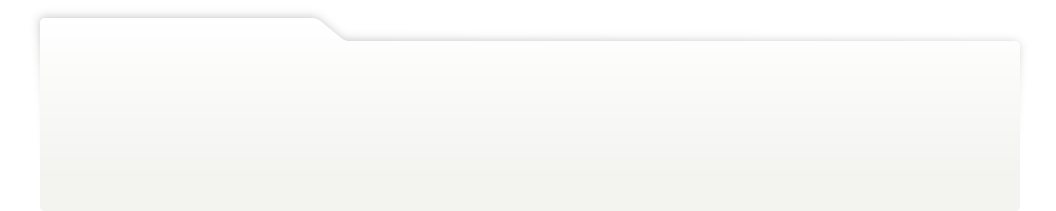
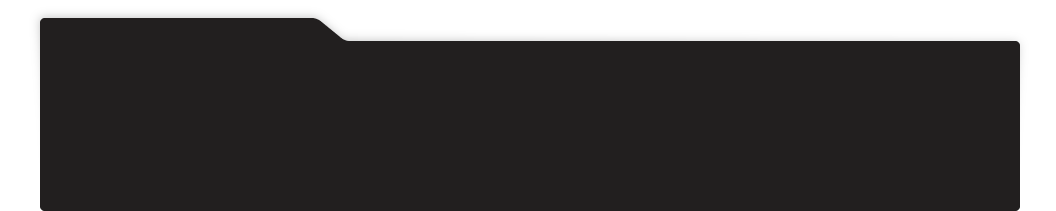
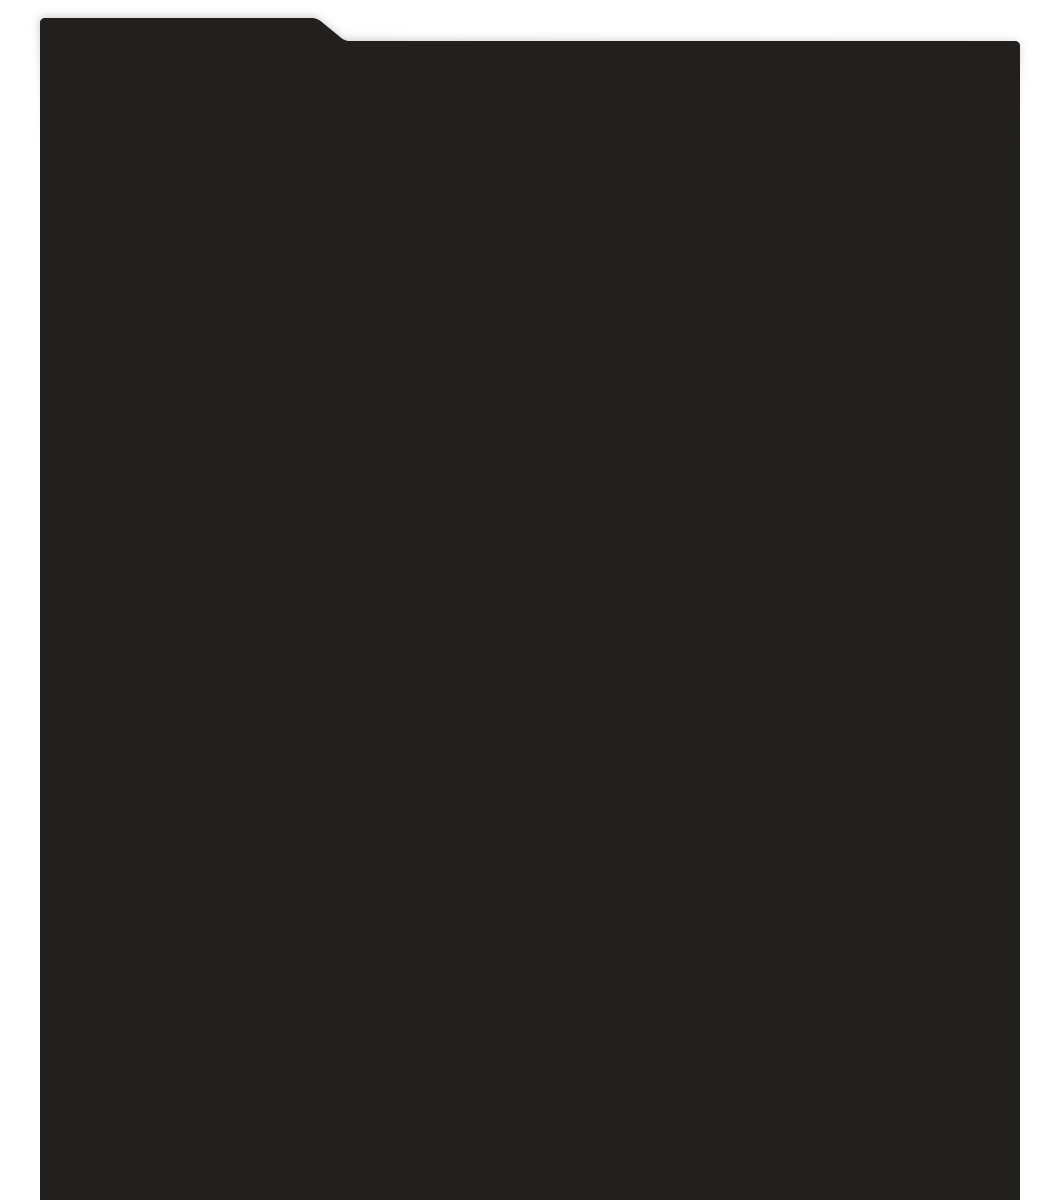
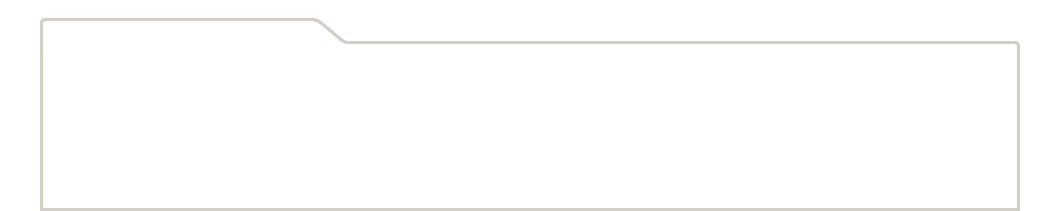
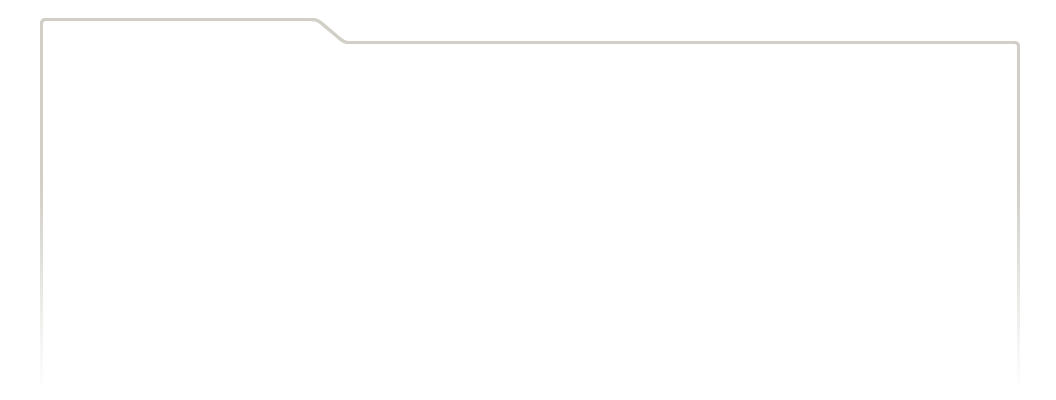
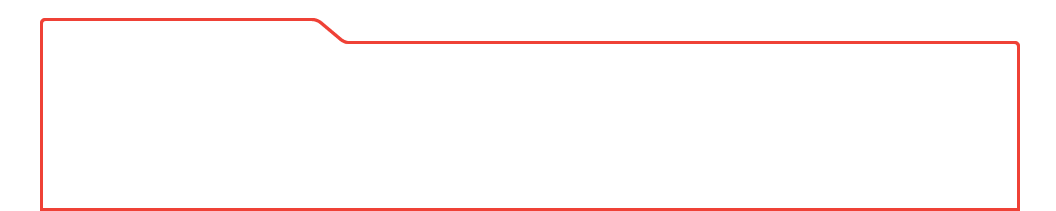
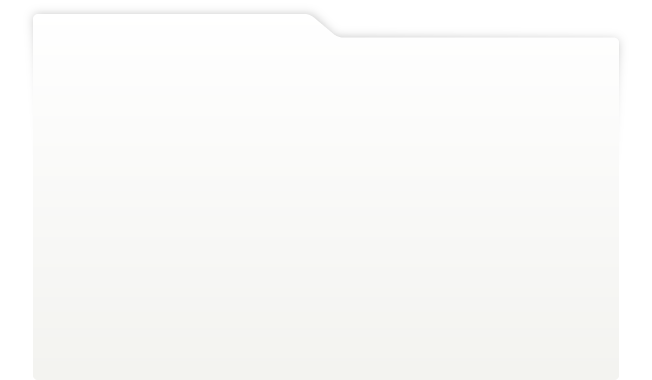
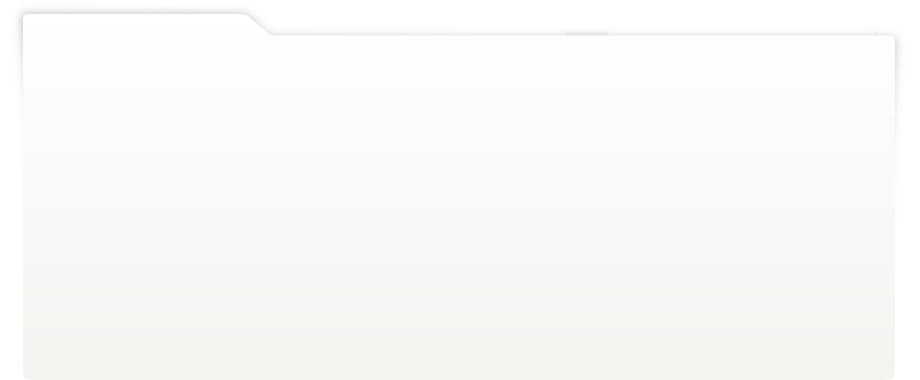
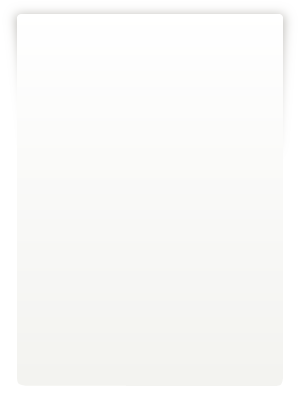
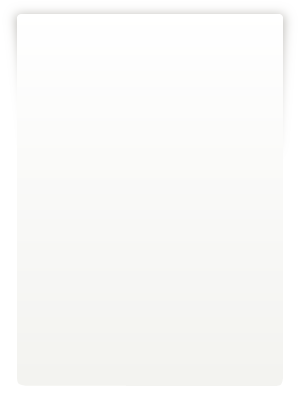
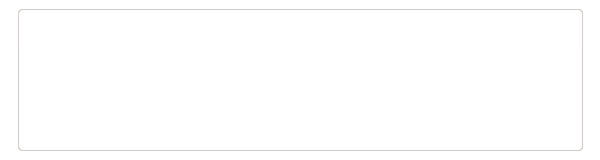
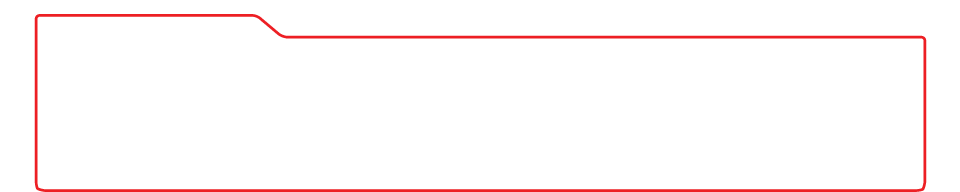
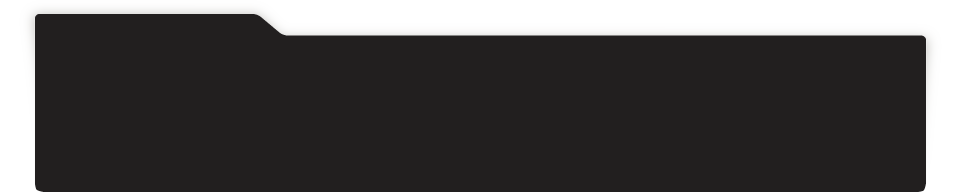
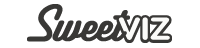
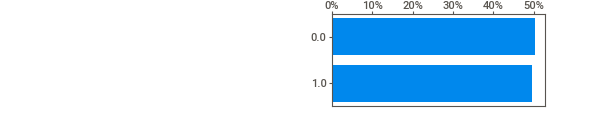
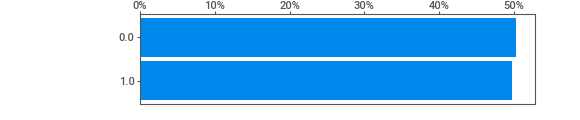
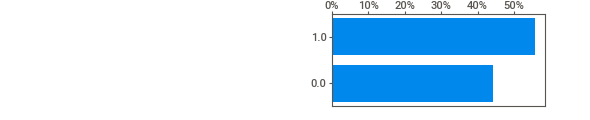
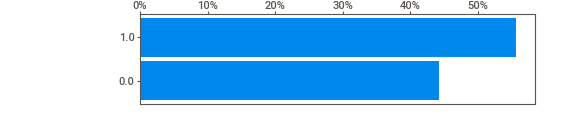
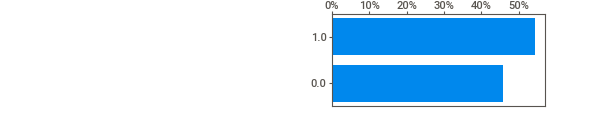
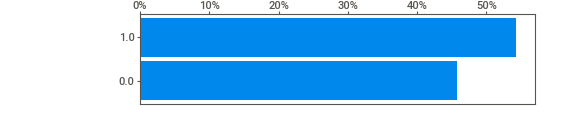
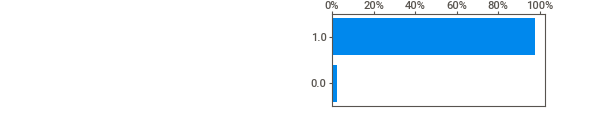
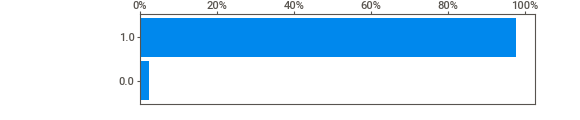
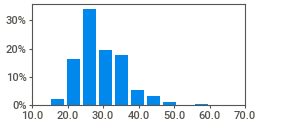
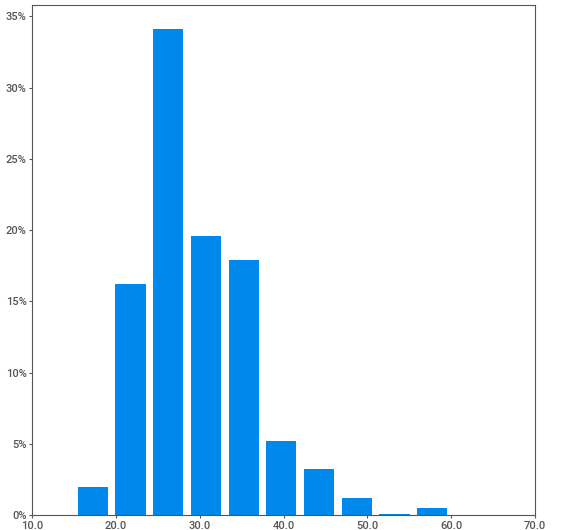
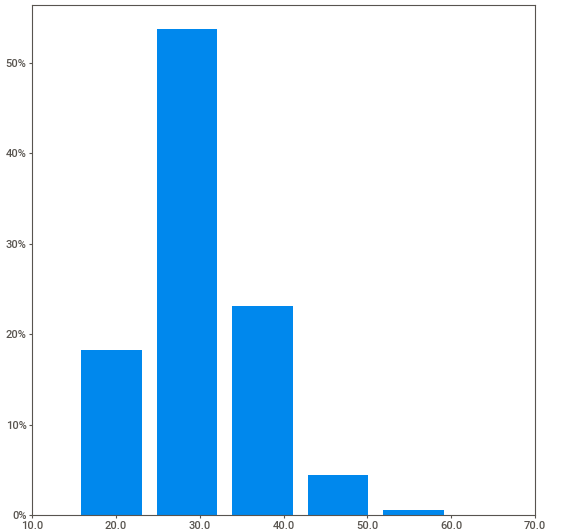
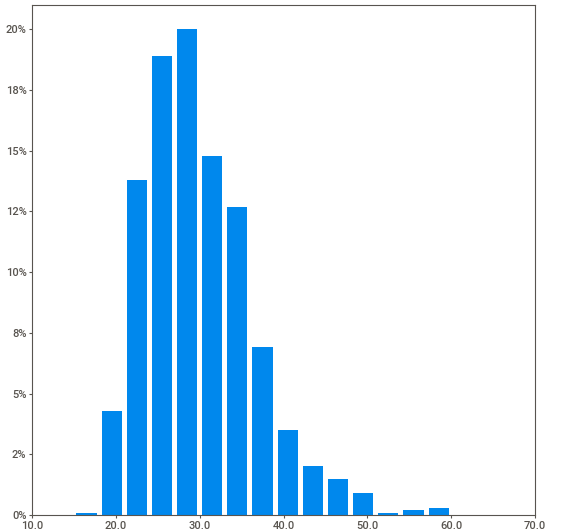
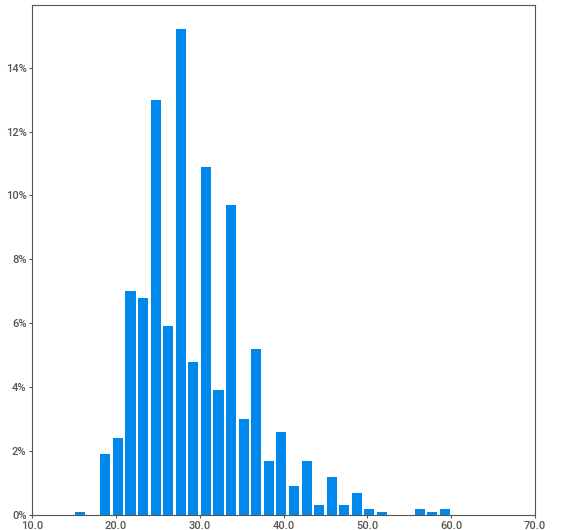
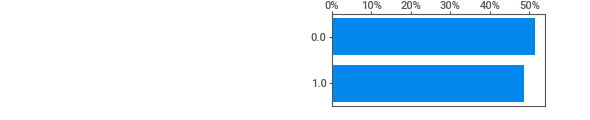
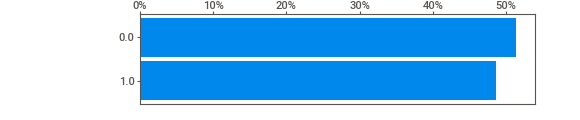
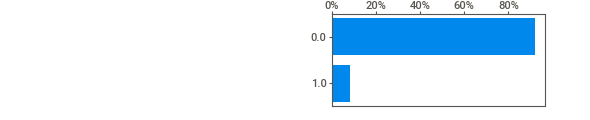
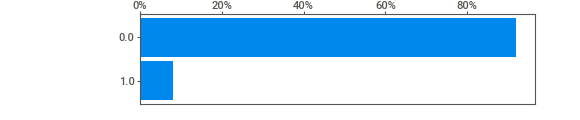
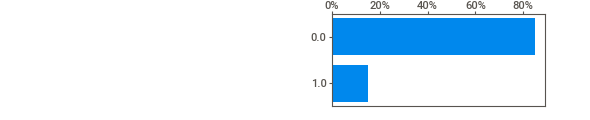
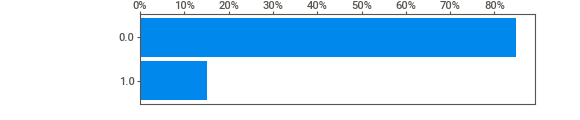
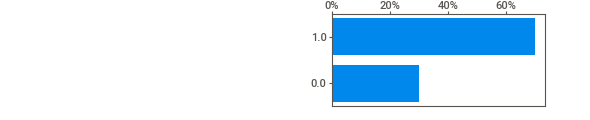
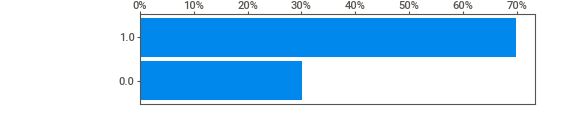
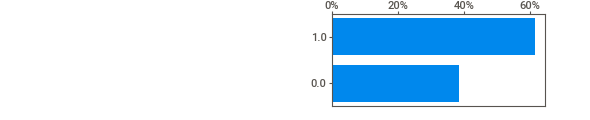
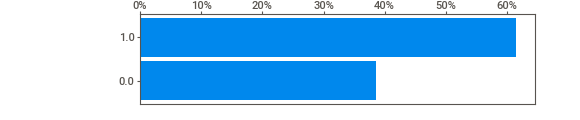
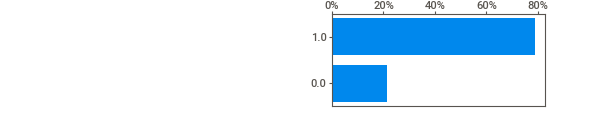
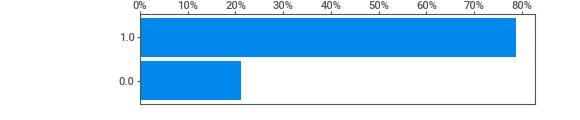
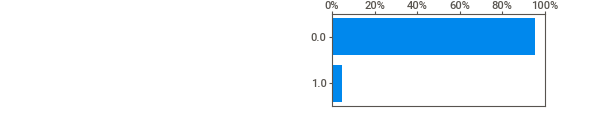
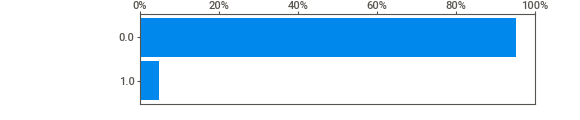
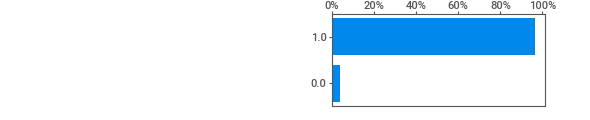
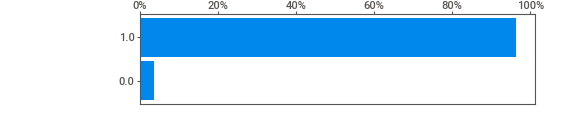
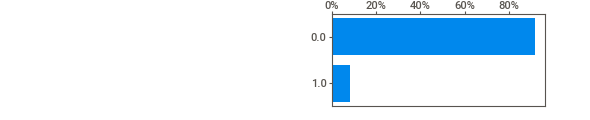
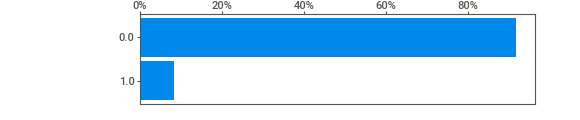
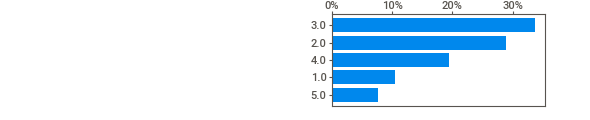
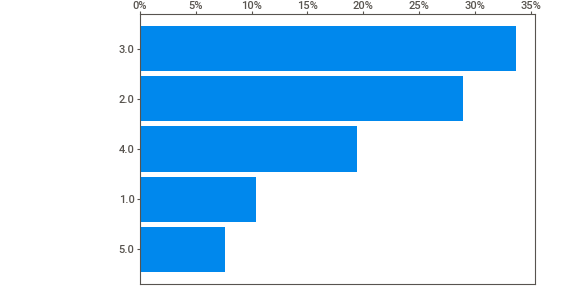
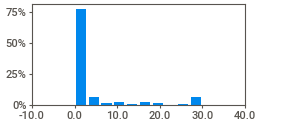
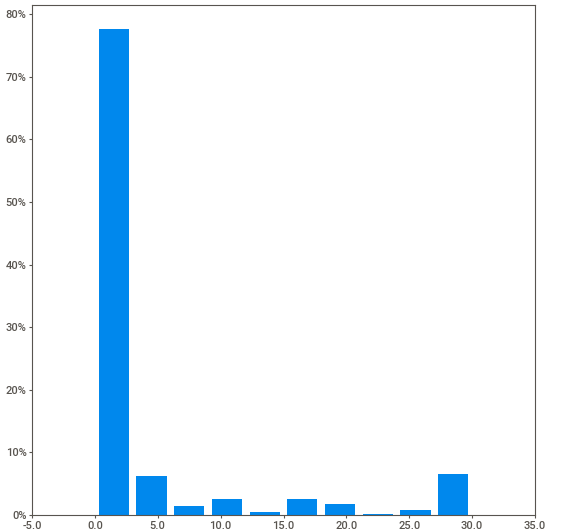
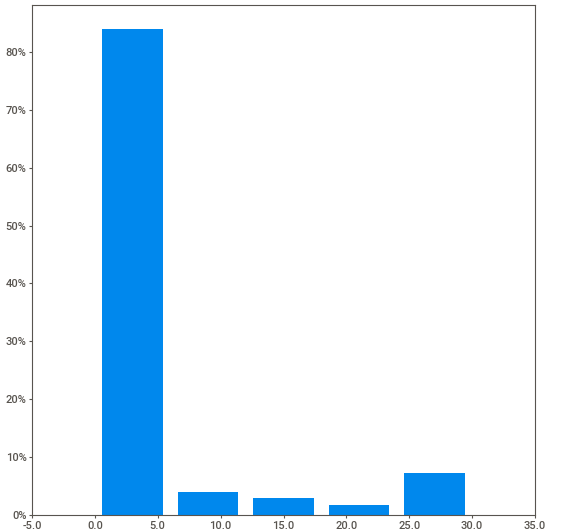
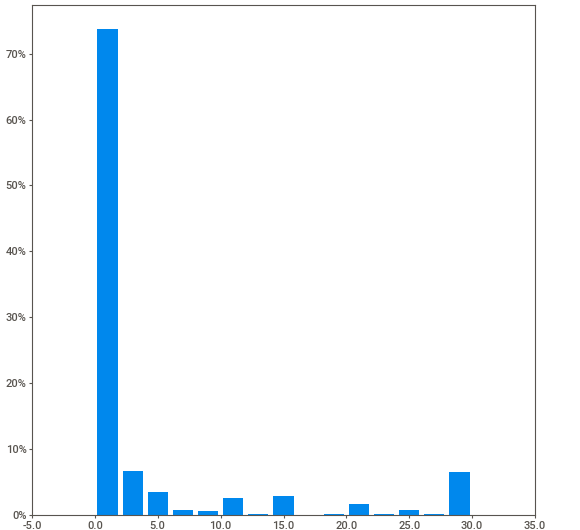
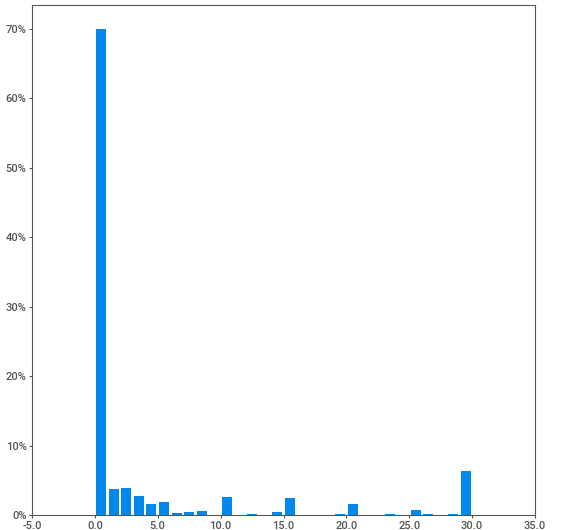
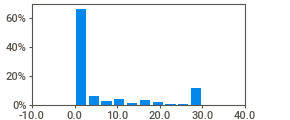
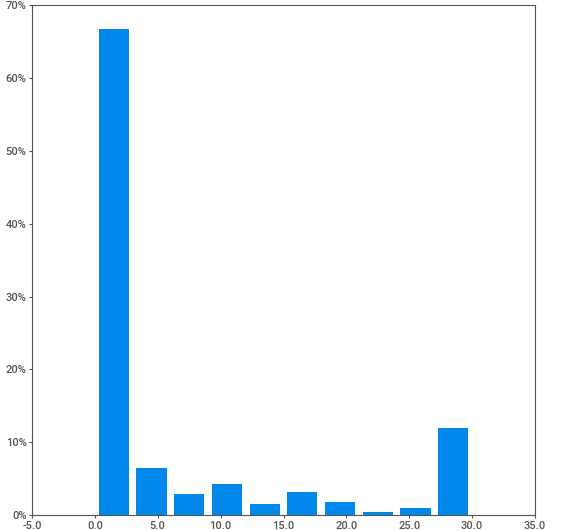
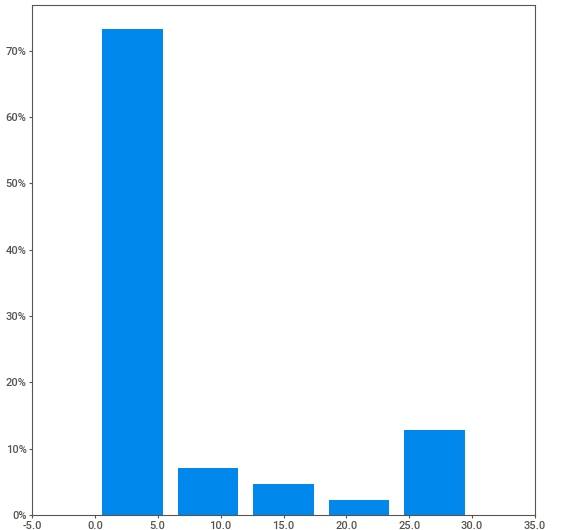
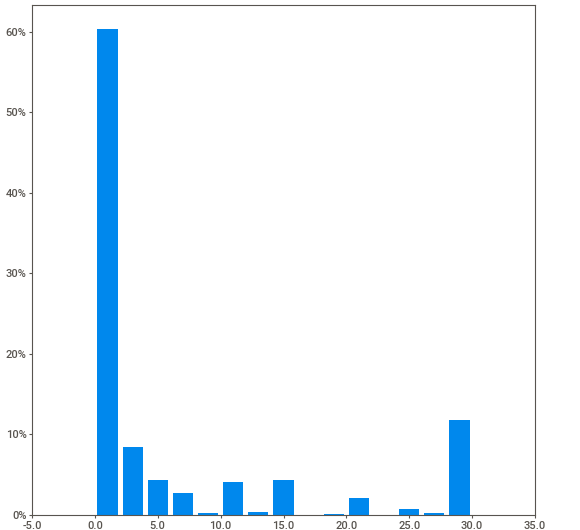
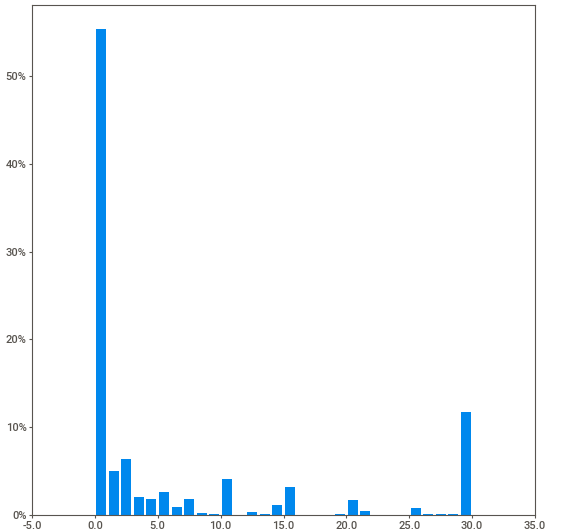
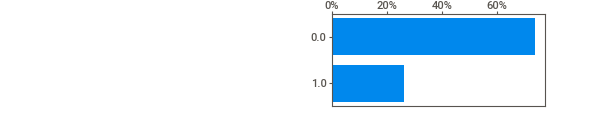
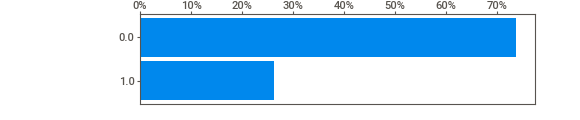
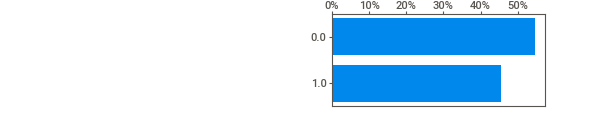
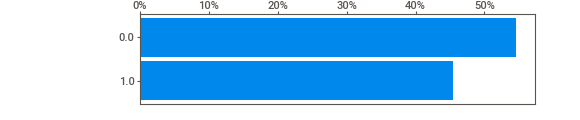
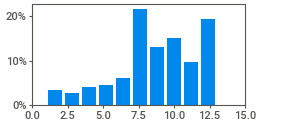
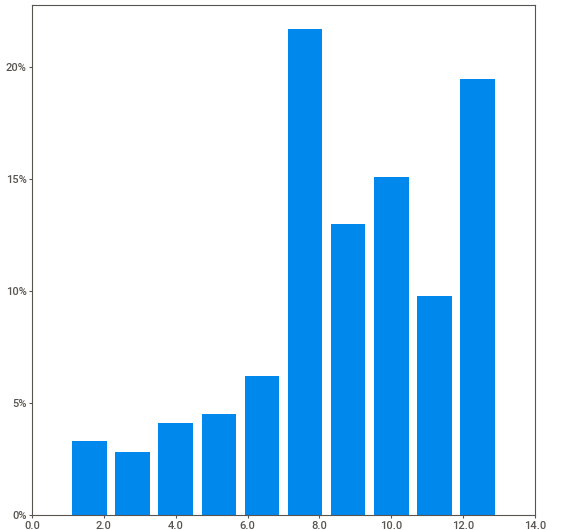
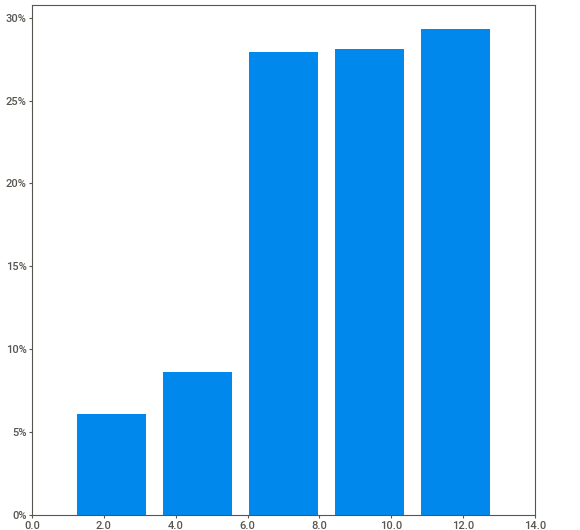
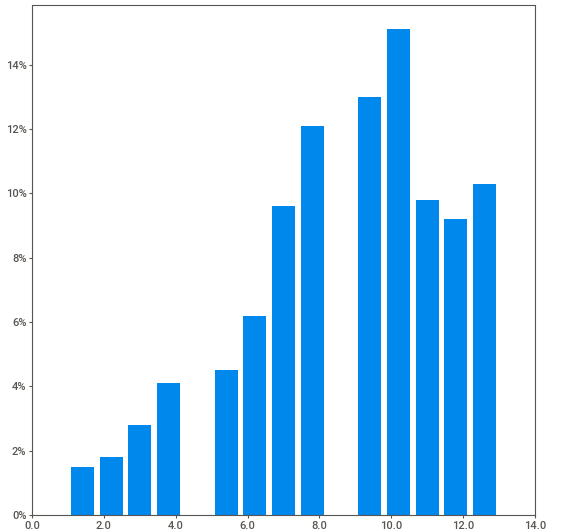
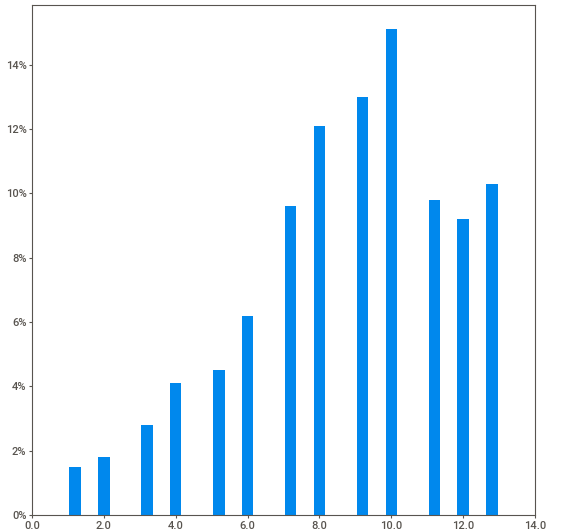
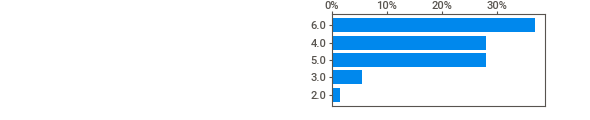
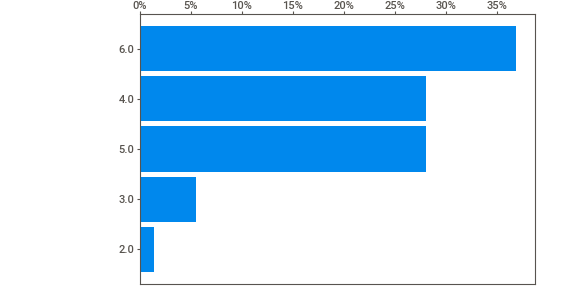
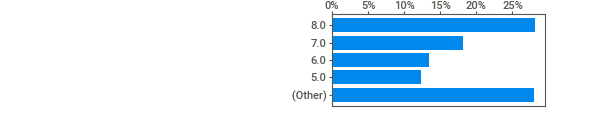
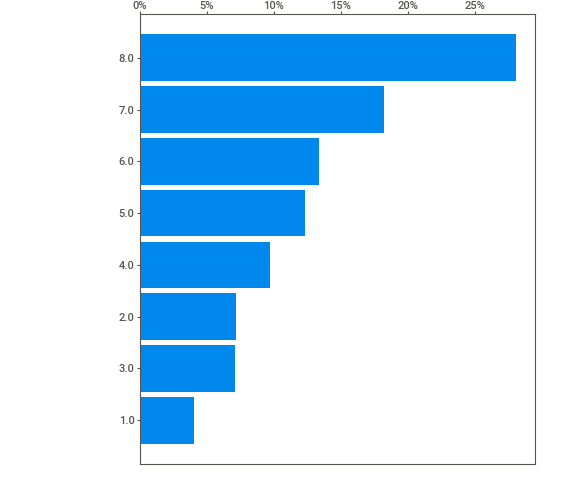
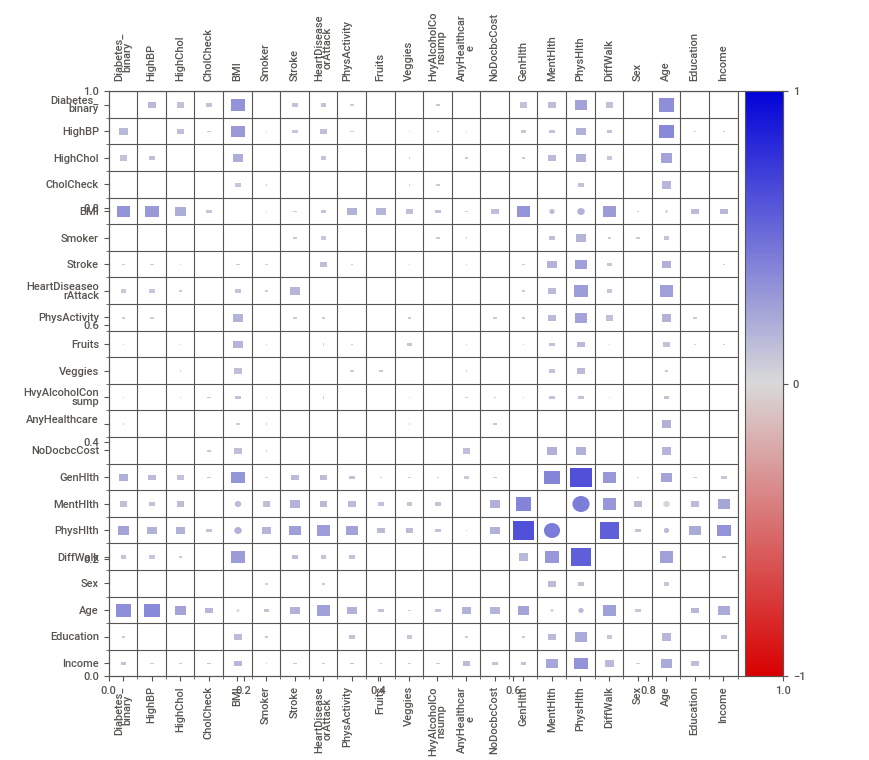
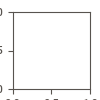

In [7]:
# Generate the report
report = sv.analyze(data)

# Visualize the report
report.show_notebook()

In [29]:
# data = data.dropna()

In [30]:
# print(data.isna().sum())

Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64


In [8]:
for column in data.columns:
    if data[column].dtype == 'object':
        unique_values = data[column].unique()
        print(f"Unique values in column [{column}] : {unique_values}")

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [10]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
44967,1.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
20220,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
23944,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
2707,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
42356,1.0,1.0,0.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 44967 to 45627
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       1000 non-null   float64
 1   HighBP                1000 non-null   float64
 2   HighChol              1000 non-null   float64
 3   CholCheck             1000 non-null   float64
 4   BMI                   1000 non-null   float64
 5   Smoker                1000 non-null   float64
 6   Stroke                1000 non-null   float64
 7   HeartDiseaseorAttack  1000 non-null   float64
 8   PhysActivity          1000 non-null   float64
 9   Fruits                1000 non-null   float64
 10  Veggies               1000 non-null   float64
 11  HvyAlcoholConsump     1000 non-null   float64
 12  AnyHealthcare         1000 non-null   float64
 13  NoDocbcCost           1000 non-null   float64
 14  GenHlth               1000 non-null   float64
 15  MentHlth             

## Splitting The Dataset (Base)

In [12]:
x = data.drop(columns=['Diabetes_binary'], axis=1).values
y = data['Diabetes_binary'].values
y = y.astype(int)

In [13]:
print("Type of x:", type(x))
print("Shape of x:", x.shape)
print("Data type of x elements:", x.dtype)
print("First 5 elements of x:\n", x[:5])

Type of x: <class 'numpy.ndarray'>
Shape of x: (1000, 21)
Data type of x elements: float64
First 5 elements of x:
 [[ 0.  1.  1. 23.  1.  0.  0.  1.  0.  1.  0.  1.  0.  4.  0.  0.  0.  0.
  10.  4.  5.]
 [ 0.  0.  1. 33.  1.  0.  0.  0.  1.  1.  0.  1.  0.  3.  0.  3.  1.  0.
  13.  5.  4.]
 [ 1.  1.  1. 27.  1.  0.  0.  1.  1.  1.  0.  1.  0.  2.  0.  5.  0.  1.
   8.  6.  6.]
 [ 0.  1.  1. 29.  1.  0.  0.  0.  1.  0.  0.  1.  0.  3.  0.  5.  0.  1.
   7.  5.  8.]
 [ 1.  0.  1. 47.  0.  0.  0.  1.  1.  1.  0.  1.  0.  4. 30. 10.  1.  1.
   6.  6.  3.]]


In [14]:
print("Type of y:", type(y))
print("Shape of y:", y.shape)
print("Data type of y elements:", y.dtype)
print("First 5 elements of y:\n", y[:5])

Type of y: <class 'numpy.ndarray'>
Shape of y: (1000,)
Data type of y elements: int32
First 5 elements of y:
 [1 0 0 0 1]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 21)
X_test shape: (200, 21)
y_train shape: (800,)
y_test shape: (200,)


In [17]:
print("\nX_train sample:")
print(X_train[:1])
print("\nX_test sample:")
print(X_test[:1])
print("\ny_train sample:")
print(y_train[:1])
print("\ny_test sample:")
print(y_test[:1])


X_train sample:
[[ 0.  0.  1. 33.  1.  1.  0.  1.  0.  0.  0.  1.  0.  3.  0.  0.  0.  1.
   8.  4.  7.]]

X_test sample:
[[ 1.  1.  1. 23.  1.  0.  0.  1.  1.  1.  0.  1.  0.  2.  0.  3.  0.  0.
  11.  5.  7.]]

y_train sample:
[1]

y_test sample:
[0]


## Train XGBoost Model On Base Dataset

In [18]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
print(f'Best XGB parameters: {best_params_xgb}')

Best XGB parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}


In [19]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.01,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Base Model Evaluation (XGBoost)

In [20]:
y_pred = xgb_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.74
Precision: 0.72
Recall: 0.79
F1-score: 0.75


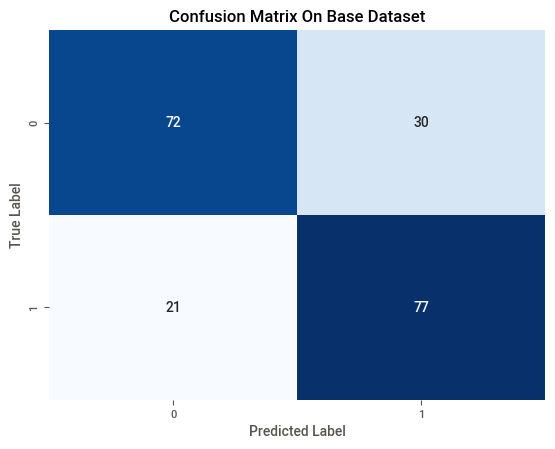

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix On Base Dataset')
plt.show()

## Scaling The Dataset

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(x)

In [23]:
print("\nfeatures_scaled sample:")
print(features_scaled[:1])
print("\ny sample:")
print(y[:1])


features_scaled sample:
[[-1.1213101   0.91739884  0.15343224 -0.97028275  1.02840321 -0.29488391
  -0.42173013  0.65621274 -1.26388393  0.51868635 -0.22207644  0.19324699
  -0.29887224  1.05949205 -0.44462597 -0.58993769 -0.59737099 -0.91186722
   0.43048347 -0.93981209 -0.34099452]]

y sample:
[1]


## PCA

In [24]:
print("Features scaled shape:", features_scaled.shape)
print("Target shape:", y.shape)
print("Any NaN in features scaled:", np.isnan(features_scaled).any())
print("Any NaN in target:", np.isnan(y).any())

Features scaled shape: (1000, 21)
Target shape: (1000,)
Any NaN in features scaled: False
Any NaN in target: False


In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.01,
    subsample=0.6,
    eval_metric='logloss'
)

# Definisikan pipeline dengan PCA dan XGBoost
pipeline_pca = Pipeline([
    ('pca', PCA()),
    ('xgb', xgb_model)
])

# Definisikan parameter grid untuk PCA
param_grid_pca = {
    'pca__n_components': [2, 4, 6, 8, 10, 11, 12, 14, 16]
}

# Lakukan Grid Search dengan pipeline
grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=5)
grid_search_pca.fit(features_scaled, y)

# Dapatkan parameter terbaik
best_params_pca = grid_search_pca.best_params_
print(f'Best PCA parameters: {best_params_pca}')

Best PCA parameters: {'pca__n_components': 11}


In [31]:
from sklearn.decomposition import PCA

# Inisialisasi dan transformasi dengan PCA
pca_model = PCA(n_components=11)
features_reduced_pca = pca_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features_scaled.shape}')
print(f'PCA reduced shape: {features_reduced_pca.shape}')

Original shape: (1000, 21)
PCA reduced shape: (1000, 11)


## Splitting The Dataset (After Feature Reduced With PCA)

In [32]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(features_reduced_pca, y, test_size=0.2, random_state=42)

In [33]:
print("X_pca_train shape:", X_pca_train.shape)
print("X_pca_test shape:", X_pca_test.shape)
print("y_pca_train shape:", y_pca_train.shape)
print("y_pca_test shape:", y_pca_test.shape)

X_pca_train shape: (800, 11)
X_pca_test shape: (200, 11)
y_pca_train shape: (800,)
y_pca_test shape: (200,)


In [34]:
print("\nX_pca_train sample:")
print(X_pca_train[:1])
print("\nX_pca_test sample:")
print(X_pca_test[:1])
print("\ny_pca_train sample:")
print(y_pca_train[:1])
print("\ny_pca_test sample:")
print(y_pca_test[:1])


X_pca_train sample:
[[ 0.04407001 -0.00629304  2.85834047 -0.50223362  0.71787585  1.37532057
  -1.51690828  1.81643748 -0.04154545  1.15314228  0.66170973]]

X_pca_test sample:
[[-0.88892812  1.49905083 -0.46596602  0.12377145  0.18703193 -0.9502349
   0.2996165  -0.78821787 -0.90296841 -0.30936159  0.25814318]]

y_pca_train sample:
[1]

y_pca_test sample:
[0]


## Train The Model (After Feature Reduced With PCA) 

In [35]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_pca = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.01,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model_pca.fit(X_pca_train, y_pca_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pca_pred = xgb_model_pca.predict(X_pca_test) 
accuracy = accuracy_score(y_pca_test, y_pca_pred)
precision = precision_score(y_pca_test, y_pca_pred)
recall = recall_score(y_pca_test, y_pca_pred)
f1 = f1_score(y_pca_test, y_pca_pred)

print('XGBoost Model Performance On PCA Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On PCA Reduced Dataset
Accuracy: 0.74
Precision: 0.71
Recall: 0.80
F1-score: 0.75


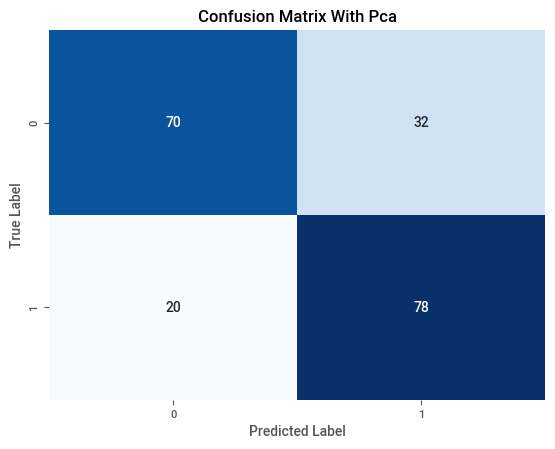

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_pca_test, y_pca_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix With Pca')
plt.show()

## UMAP

In [38]:
features_high_precision = features_scaled.astype('float64')

In [39]:
features_high_precision_noisy = features_high_precision + np.random.normal(0, 0.01, features_high_precision.shape)

In [40]:
import umap.umap_ as umap
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=1.0,
    eval_metric='logloss'
)

# Definisikan pipeline dengan UMAP dan XGBoost
pipeline_umap = Pipeline([
    ('umap', umap.UMAP()),
    ('xgb', xgb_model)
])

# Definisikan parameter grid untuk UMAP dan XGBoost
param_grid_umap = {
    'umap__n_neighbors': [10, 15, 20, 25],
    'umap__n_components': [10, 12, 14],
    'umap__min_dist': [0.1, 0.3, 0.5],
    'umap__metric': ['euclidean', 'manhattan'],
}

# Lakukan Grid Search dengan pipeline
grid_search_umap = GridSearchCV(pipeline_umap, param_grid_umap, cv=3)
# grid_search_umap.fit(features_scaled, y)
# grid_search_umap.fit(features_high_precision, y)
grid_search_umap.fit(features_high_precision_noisy, y)

# Dapatkan parameter terbaik
best_params_umap = grid_search_umap.best_params_
print(f'Best UMAP parameters: {best_params_umap}')

Best UMAP parameters: {'umap__metric': 'euclidean', 'umap__min_dist': 0.5, 'umap__n_components': 14, 'umap__n_neighbors': 20}


In [41]:
import umap.umap_ as umap

# Inisialisasi dan transformasi dengan UMAP
umap_model= umap.UMAP(
    n_neighbors=20,
    n_components=14,
    min_dist=0.5,
    metric='euclidean',
)
features_reduced_umap = umap_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features_scaled.shape}')
print(f'UMAP reduced shape: {features_reduced_umap.shape}')

Original shape: (1000, 21)
UMAP reduced shape: (1000, 14)


## Splitting The Dataset (After Feature Reduced With UMAP)

In [42]:
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(features_reduced_umap, y, test_size=0.2, random_state=42)

In [43]:
print("X_umap_train shape:", X_umap_train.shape)
print("X_umap_test shape:", X_umap_test.shape)
print("y_umap_train shape:", y_umap_train.shape)
print("y_umap_test shape:", y_umap_test.shape)

X_umap_train shape: (800, 14)
X_umap_test shape: (200, 14)
y_umap_train shape: (800,)
y_umap_test shape: (200,)


In [44]:
print("\nX_umap_train sample:")
print(X_umap_train[:1])
print("\nX_umap_test sample:")
print(X_umap_test[:1])
print("\ny_umap_train sample:")
print(y_umap_train[:1])
print("\ny_umap_test sample:")
print(y_umap_test[:1])


X_umap_train sample:
[[12.074424   1.3965528  5.9711924  2.6244497 12.753474   7.5231028
   5.992067  -1.1157359  3.6109157  5.0027285  3.2125747  6.351391
   3.8826642  5.5720625]]

X_umap_test sample:
[[13.770001   1.2423896  6.2968616  1.4392883 12.004739   8.530051
   5.199806  -1.7177953  2.756575   6.325868   3.622689   6.710674
   3.4058473  6.1644835]]

y_umap_train sample:
[1]

y_umap_test sample:
[0]


## Train The Model (After Feature Reduced With UMAP) 

In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_umap = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.01,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model_umap.fit(X_umap_train, y_umap_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [46]:
y_umap_pred = xgb_model_umap.predict(X_umap_test) 
accuracy = accuracy_score(y_umap_test, y_umap_pred)
precision = precision_score(y_umap_test, y_umap_pred)
recall = recall_score(y_umap_test, y_umap_pred)
f1 = f1_score(y_umap_test, y_umap_pred)

print('XGBoost Model Performance On UMAP Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On UMAP Reduced Dataset
Accuracy: 0.76
Precision: 0.72
Recall: 0.81
F1-score: 0.76


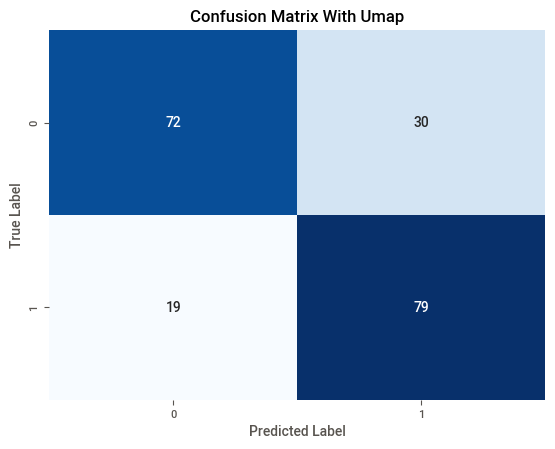

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_umap_test, y_umap_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix With Umap')
plt.show()
